[Reference](https://towardsdatascience.com/10-things-you-didnt-know-about-scikit-learn-cccc94c50e4f)

# 1. Scikit-learn has built-in data sets

In [1]:
# Toy regression data set loading
from sklearn.datasets import load_boston

X,y = load_boston(return_X_y = True)

# Synthetic regresion data set loading
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=10000, noise=100, random_state=0)

# 2. Third-party public data sets are also easily available

In [2]:
from sklearn.datasets import fetch_openml

X,y = fetch_openml("wine", version=1, as_frame=True, return_X_y=True)

# 3. There are ready-made classifiers to train baseline models

In [3]:
from sklearn.dummy import DummyClassifier

# Fit the model on the wine dataset and return the model score
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=0)

dummy_clf.fit(X, y)

dummy_clf.score(X, y)

0.398876404494382

# 4. Scikit-learn has its own plotting API

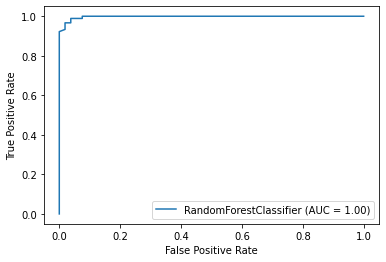

In [4]:
import matplotlib.pyplot as plt 
from sklearn import metrics, model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

X,y = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

# 5. Scikit-learn has built-in feature selection methods

In [5]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, chi2

X,y = load_wine(return_X_y = True)

X_trasformed = SelectPercentile(chi2, percentile=60).fit_transform(X, y)

# 6. Pipelines allow you to chain together all the steps in a machine learning workflow

In [6]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X,y = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)

# Chain together scaling the variables with the model
pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.972027972027972

# 7. With the ColumnTransformer you can apply different preprocessing to different features

In [7]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load auto93 data set which contains both categorical and numeric features
X,y = fetch_openml("auto93", version=1, as_frame=True, return_X_y=True)

# Create lists of numeric and categorical features  
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)

# Create a numeric and categorical transformer to perform preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Use the ColumnTransformer to apply to the correct features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append regressor to the preprocessor
lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])

# Fit the complete pipeline
lr.fit(X_train, y_train)
print("model score: %.3f" % lr.score(X_test, y_test))

model score: 0.766


# 8. You can easily output an HTML representation of your pipeline

In [8]:
from sklearn import set_config

set_config(display='diagram')   

lr

TypeError: ignored

# 9. There is a plotting function to visualise trees

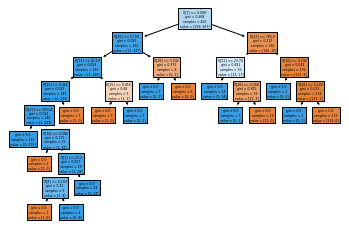

In [9]:
import matplotlib.pyplot as plt 
from sklearn import metrics, model_selection
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_breast_cancer

X,y = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

plot_tree(clf, filled=True)
plt.show()

# 10. There are many third-party libraries that extend the features of Scikit-learn

In [11]:
!pip install category_encoders

     |████████████████████████████████| 81kB 4.7MB/s 


In [12]:
# Pipeline using Weight of Evidence transformer from category encoders

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import category_encoders as ce

# Load auto93 data set which contains both categorical and numeric features
X,y = fetch_openml("auto93", version=1, as_frame=True, return_X_y=True)

# Create lists of numeric and categorical features  
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)

# Create a numeric and categorical transformer to perform preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('woe', ce.woe.WOEEncoder())])

# Use the ColumnTransformer to apply to the correct features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append regressor to the preprocessor
lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])

# Fit the complete pipeline
lr.fit(X_train, y_train)
print("model score: %.3f" % lr.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


model score: 0.766
